In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
from time import time

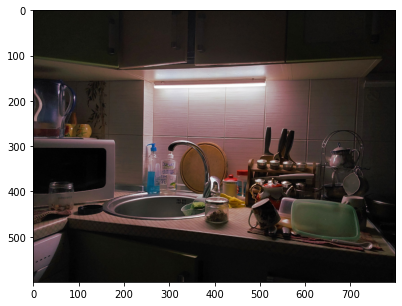

In [93]:
img = cv2.imread('./image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

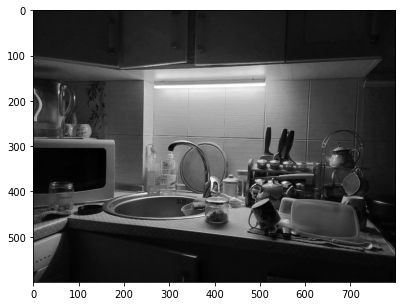

In [94]:
# Take channel to play with histogram
imgHsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(imgHsv)
plt.imshow(v, cmap='gray', vmin=0, vmax=255)

In [95]:
# Modify channel
hist, bins = np.histogram(v.ravel(), bins=256, range=(0,255))

v2 = cv2.equalizeHist(v)
hist2, bins2 = np.histogram(v2.ravel(), bins=256, range=(0,255))

clahe = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(4,4))
v3 = clahe.apply(v)
hist3, bins3 = np.histogram(v3.ravel(), bins=256, range=(0,255))

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2b68bee0640>], None)

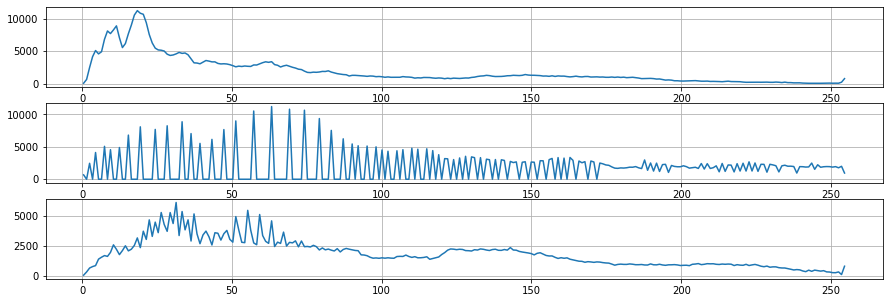

In [96]:
plt.subplot(311), plt.plot(bins[0:-1]+0.5, hist), plt.grid(True)
plt.subplot(312), plt.plot(bins2[0:-1]+0.5, hist2), plt.grid(True)
plt.subplot(313), plt.plot(bins3[0:-1]+0.5, hist3), plt.grid(True)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2b68dcf1360>)

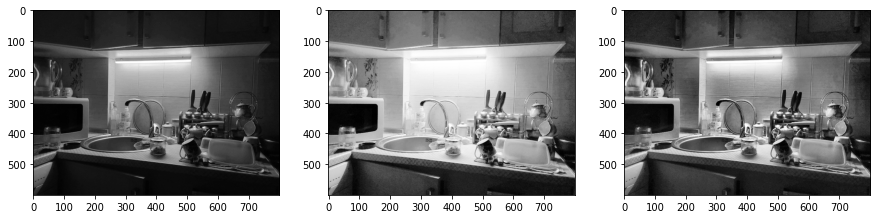

In [97]:
plt.subplot(131), plt.imshow(v, cmap='gray', vmin=0, vmax=255)
plt.subplot(132), plt.imshow(v2, cmap='gray', vmin=0, vmax=255)
plt.subplot(133), plt.imshow(v3, cmap='gray', vmin=0, vmax=255)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2b68dd7a2f0>)

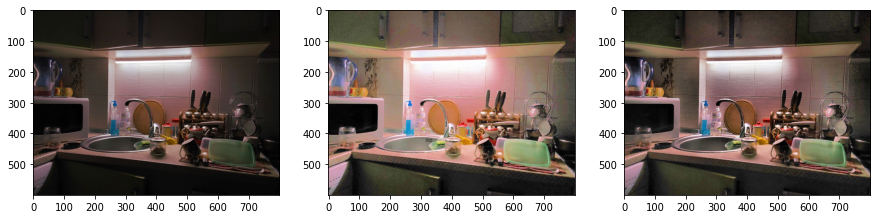

In [98]:
img2 = cv2.cvtColor(cv2.merge([h, s, v2]), cv2.COLOR_HSV2RGB)
img3 = cv2.cvtColor(cv2.merge([h, s, v3]), cv2.COLOR_HSV2RGB)
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(img2)
plt.subplot(133), plt.imshow(img3)